In [2]:
# import the packages that we'll need

import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.widgets as mwidgets
%matplotlib inline
sns.set_style(style='white')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [3]:
rat_df = pd.read_csv('/Users/rmtaylor/Dropbox/Captain Nano/BacaLab/Data/Metabolites.csv')

In [4]:
rat_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat,Unnamed: 56
0,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN
1,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN
4,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Find out how many rows and columns are now in the dataframe

print ('Number of rows and columns in dataframe', rat_df.shape)

Number of rows and columns in dataframe (189, 57)


In [6]:
#Look at some basic statistics about the data

rat_df.describe()

,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Hours_Isoflurane,Blood_Glu,Blood_Lac,Blood_Ket,...,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat,Unnamed: 56
count,189.0,189.000000,189.000000,189.000000,104.000000,107.000000,175.000000,172.000000,102.000000,146.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.0,3.000000,0.0
mean,0.0,0.206349,0.111111,0.216931,275.309615,9.140187,0.932286,297.093023,4.831373,0.188356,...,23.950000,15.466667,29.300000,499.650000,1.110000,10.017500,15.800000,2.1,30.500000,NaN
std,0.0,0.405759,0.315104,0.413250,63.709967,6.512975,0.572709,116.016749,4.776676,0.507123,...,1.202082,9.962597,0.989949,32.456201,0.070711,16.734918,0.141421,0.0,23.859799,NaN
min,0.0,0.000000,0.000000,0.000000,128.000000,5.000000,0.050000,78.000000,1.100000,0.000000,...,23.100000,4.000000,28.600000,476.700000,1.060000,0.510000,15.700000,2.1,3.000000,NaN
25%,0.0,0.000000,0.000000,0.000000,217.000000,5.000000,0.420000,193.500000,2.300000,0.000000,...,23.525000,12.200000,28.950000,488.175000,1.085000,0.547500,15.750000,2.1,22.900000,NaN
50%,0.0,0.000000,0.000000,0.000000,271.000000,5.000000,0.900000,301.000000,2.900000,0.000000,...,23.950000,20.400000,29.300000,499.650000,1.110000,2.280000,15.800000,2.1,42.800000,NaN
75%,0.0,0.000000,0.000000,0.000000,340.900000,8.500000,1.425000,375.000000,5.050000,0.200000,...,24.375000,21.200000,29.650000,511.125000,1.135000,11.750000,15.850000,2.1,44.250000,NaN
max,0.0,1.000000,1.000000,1.000000,449.000000,21.000000,2.080000,571.000000,18.800000,2.500000,...,24.800000,22.000000,30.000000,522.600000,1.160000,35.000000,15.900000,2.1,45.700000,NaN


In [7]:
#What are the different unique rats used and how many rows of data do we have for each?

rat_df['ID'].value_counts()

A1_38555          27
A2_33134          24
A3_38555          24
S1_38789          19
180626_3          16
180628            12
180822_17.25hr    12
180822_19hr       11
180914_0hr         9
180905_17.5        8
180914_14hr        8
180807_G           6
38556_C1           4
39624_S4           3
39624_S2           3
39624_S3           2
38788_B1           1
Name: ID, dtype: int64

## Exploratory Data Analysis (EDA)

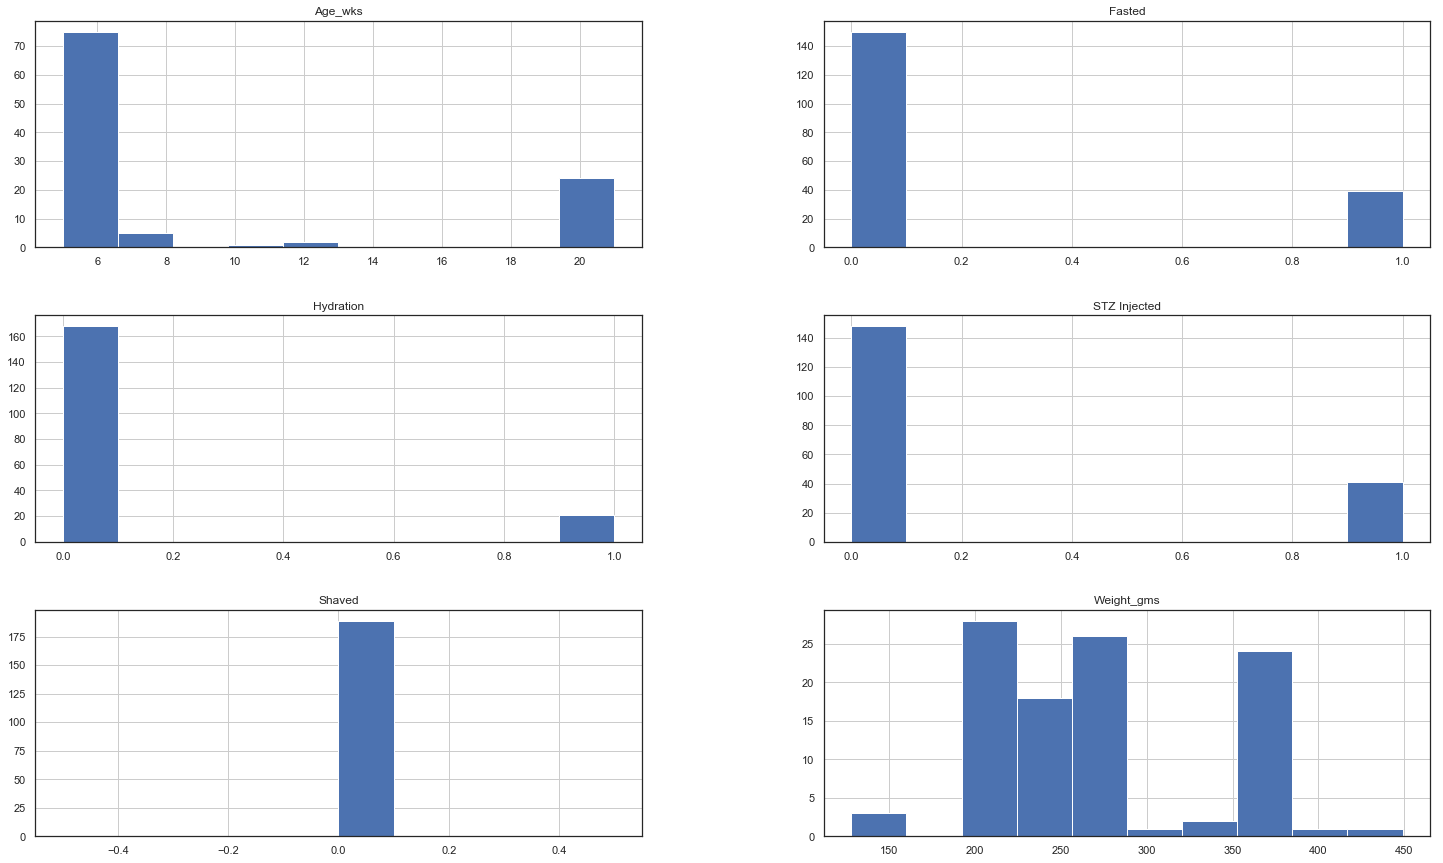

In [8]:
#Let's first look at the counts for each feature

fig = rat_df[['ID','Fasted','Hydration','STZ Injected', 'Weight_gms','Sex', 'Age_wks', 'Shaved']]
fig.hist(figsize = (25,15))
plt.show()

In [9]:
#... and let's look at the counts of the different ages, fasting, hydration, etc...

rat_df['Age_wks'].value_counts()

5.0     54
21.0    24
6.5     18
7.0      5
6.0      3
12.0     2
10.0     1
Name: Age_wks, dtype: int64

In [10]:
rat_df['Fasted'].value_counts()

0    150
1     39
Name: Fasted, dtype: int64

In [11]:
rat_df['Hydration'].value_counts()

0    168
1     21
Name: Hydration, dtype: int64

In [12]:
rat_df['STZ Injected'].value_counts()

0    148
1     41
Name: STZ Injected, dtype: int64

In [13]:
rat_df['Weight_gms'].value_counts()

217.0    27
271.0    24
367.0    24
249.0    18
128.0     2
332.2     1
449.0     1
398.0     1
266.0     1
288.0     1
219.0     1
158.0     1
289.0     1
324.0     1
Name: Weight_gms, dtype: int64

In [14]:
rat_df['Shaved'].value_counts()

0    189
Name: Shaved, dtype: int64

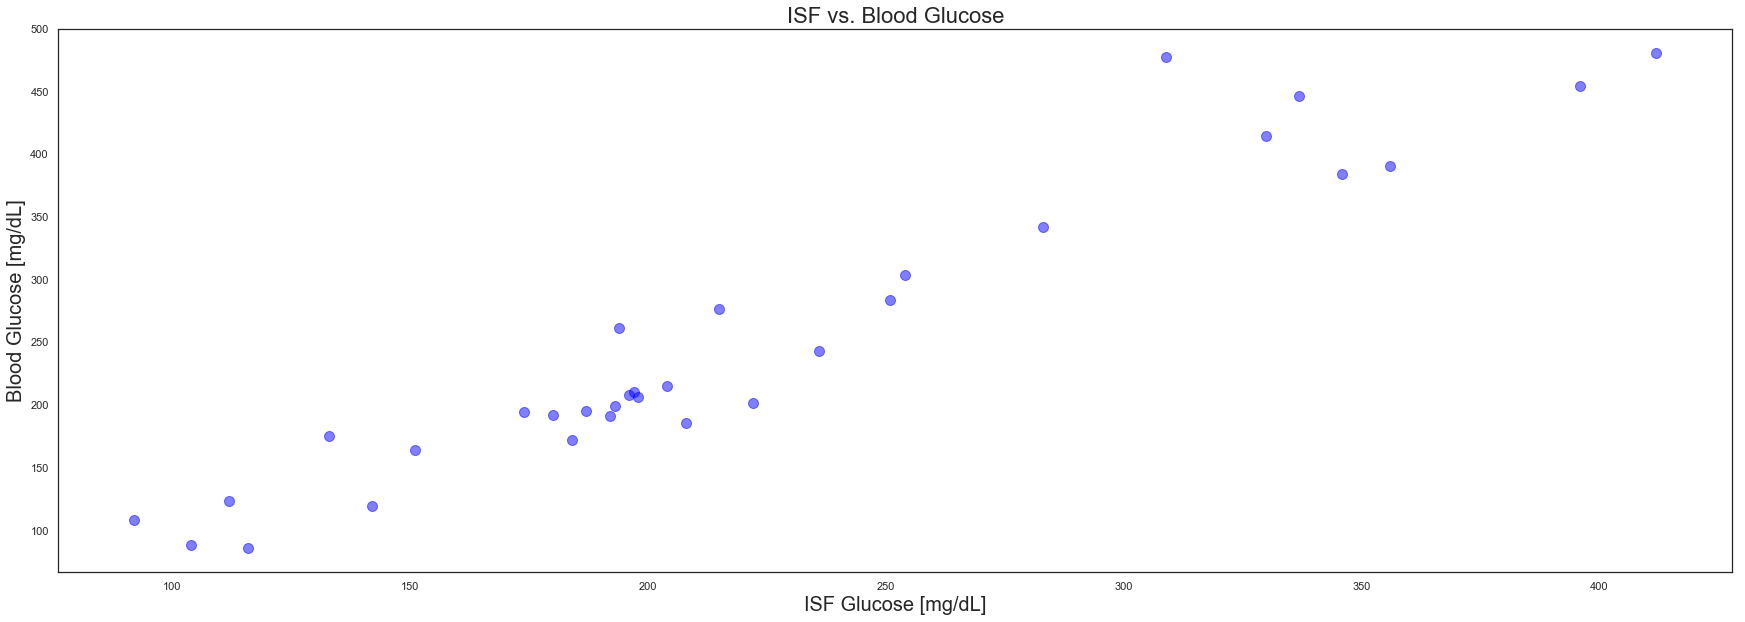

In [15]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.ISF_Glu, rat_df.Blood_Glu, s=100, alpha=0.5, color='blue')
plt.xlabel("ISF Glucose [mg/dL]", fontsize = 20)
plt.ylabel("Blood Glucose [mg/dL]", fontsize = 20)
plt.title("ISF vs. Blood Glucose", fontsize = 22)
plt.show()

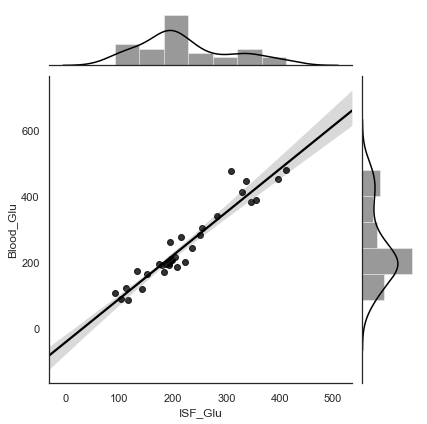

In [16]:
sns.jointplot(x=rat_df.ISF_Glu, y=rat_df.Blood_Glu, kind="reg", color='black')

In [17]:
Glu_df = rat_df[['Blood_Glu', 'ISF_Glu']]
Glu_df.shape

(189, 2)

In [18]:
Glu_df = Glu_df.dropna()

In [19]:
Glu_df.head()

,Blood_Glu,ISF_Glu
143,175.0,133.0
145,206.0,198.0
146,185.0,208.0
147,208.0,196.0
148,195.0,187.0


In [20]:
Glu_df.shape

(32, 2)

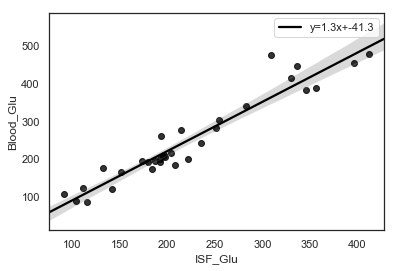

In [21]:
from scipy import stats
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Glu_df['ISF_Glu'],Glu_df['Blood_Glu'])

ax = ax = sns.regplot(x="ISF_Glu", y="Blood_Glu", data=Glu_df, color='black', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

In [22]:
Ket_df = rat_df[['Blood_Ket', 'ISF_Ket']]
Ket_df.shape

(189, 2)

In [23]:
Ket_df = Ket_df.dropna()
Ket_df.shape

(74, 2)

In [24]:
Ket_df.head()

,Blood_Ket,ISF_Ket
95,0.0,0.9
96,0.0,0.5
97,0.0,0.4
98,0.0,0.6
99,0.0,0.3


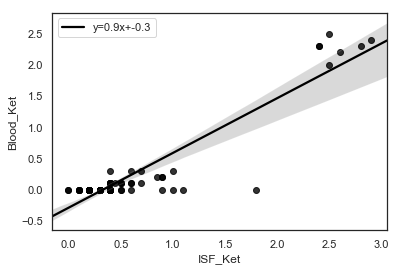

In [25]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Ket_df['ISF_Ket'],Ket_df['Blood_Ket'])

ax = ax = sns.regplot(x="ISF_Ket", y="Blood_Ket", data=Ket_df, color='black', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

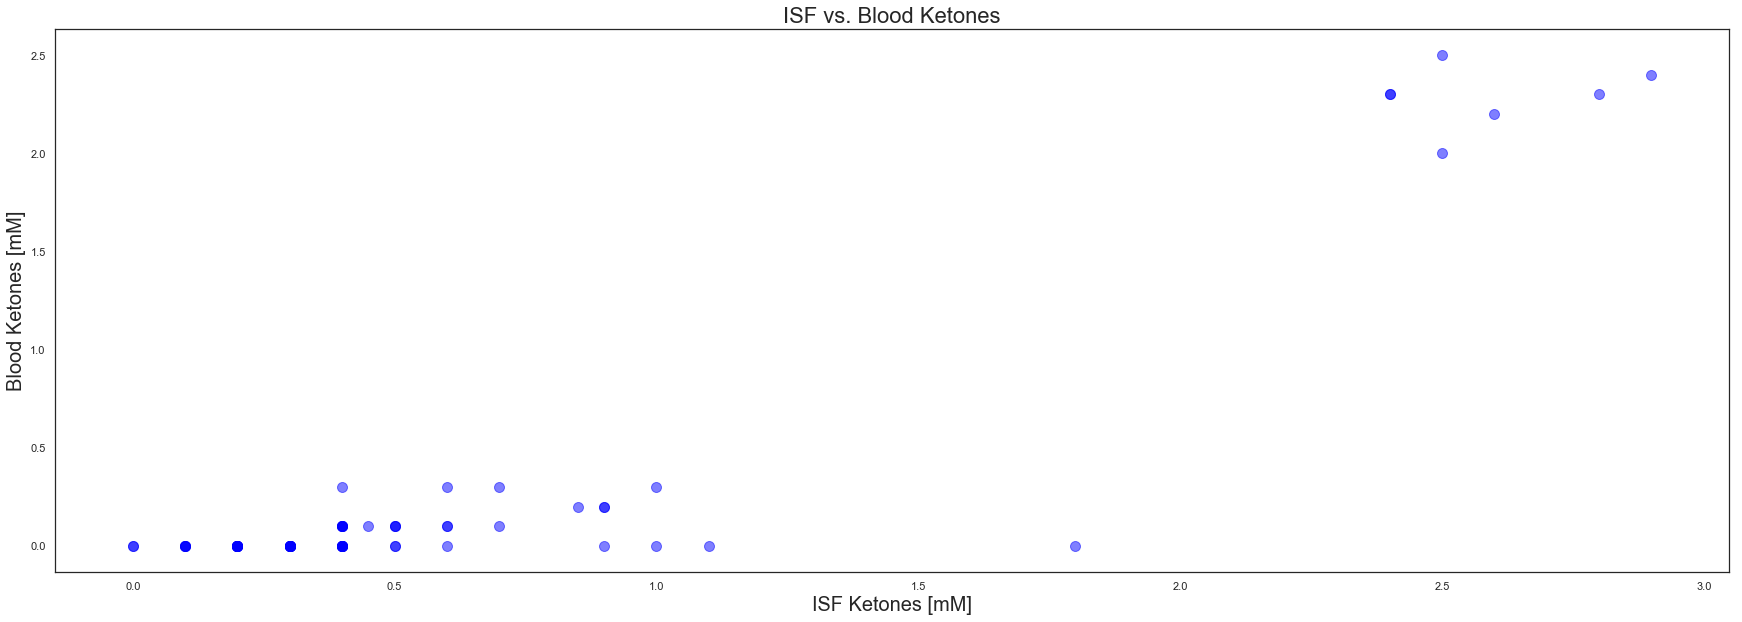

In [26]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.ISF_Ket, rat_df.Blood_Ket, s=100, alpha=0.5, color='blue')
plt.xlabel("ISF Ketones [mM]", fontsize = 20)
plt.ylabel("Blood Ketones [mM]", fontsize = 20)
plt.title("ISF vs. Blood Ketones", fontsize = 22)
plt.show()

In [27]:
Lac_df = rat_df[['Blood_Lac', 'ISF_Lac']]
Lac_df.shape

(189, 2)

In [28]:
Lac_df = Lac_df.dropna()
Lac_df.shape

(0, 2)

In [29]:
female_df = rat_df[rat_df['Sex']== 'F']
female_df.shape

(75, 57)

In [30]:
male_df = rat_df[rat_df['Sex']== 'M']
male_df.shape

(32, 57)

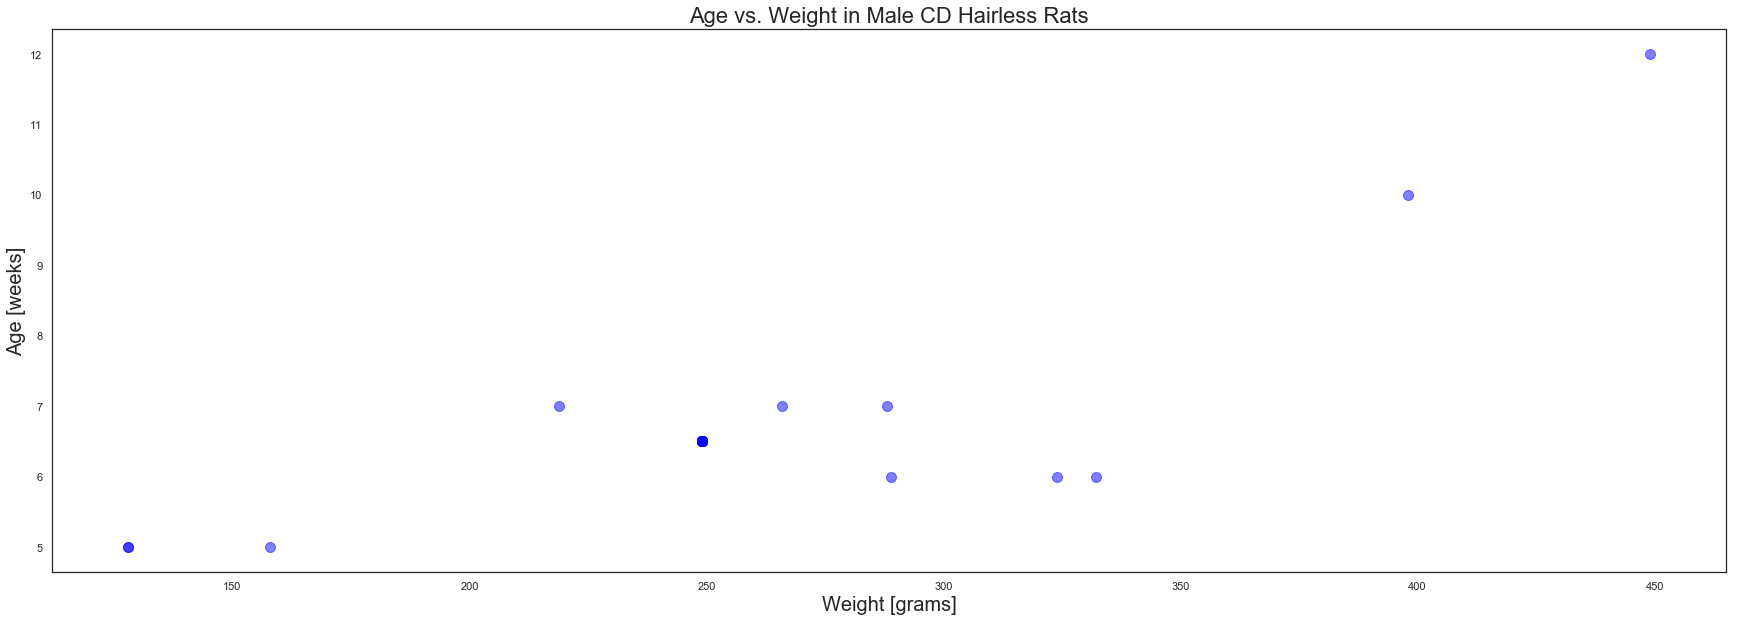

In [31]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(male_df.Weight_gms, male_df.Age_wks, s=100, alpha=0.5, color='blue')
plt.xlabel("Weight [grams]", fontsize = 20)
plt.ylabel("Age [weeks]", fontsize = 20)
plt.title("Age vs. Weight in Male CD Hairless Rats", fontsize = 22)
plt.show()

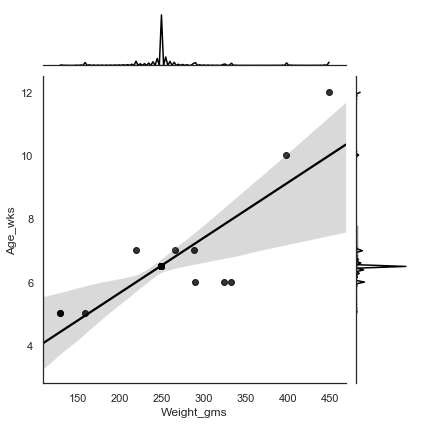

In [32]:
sns.jointplot(x=male_df.Weight_gms, y=male_df.Age_wks, kind="reg", color='black')

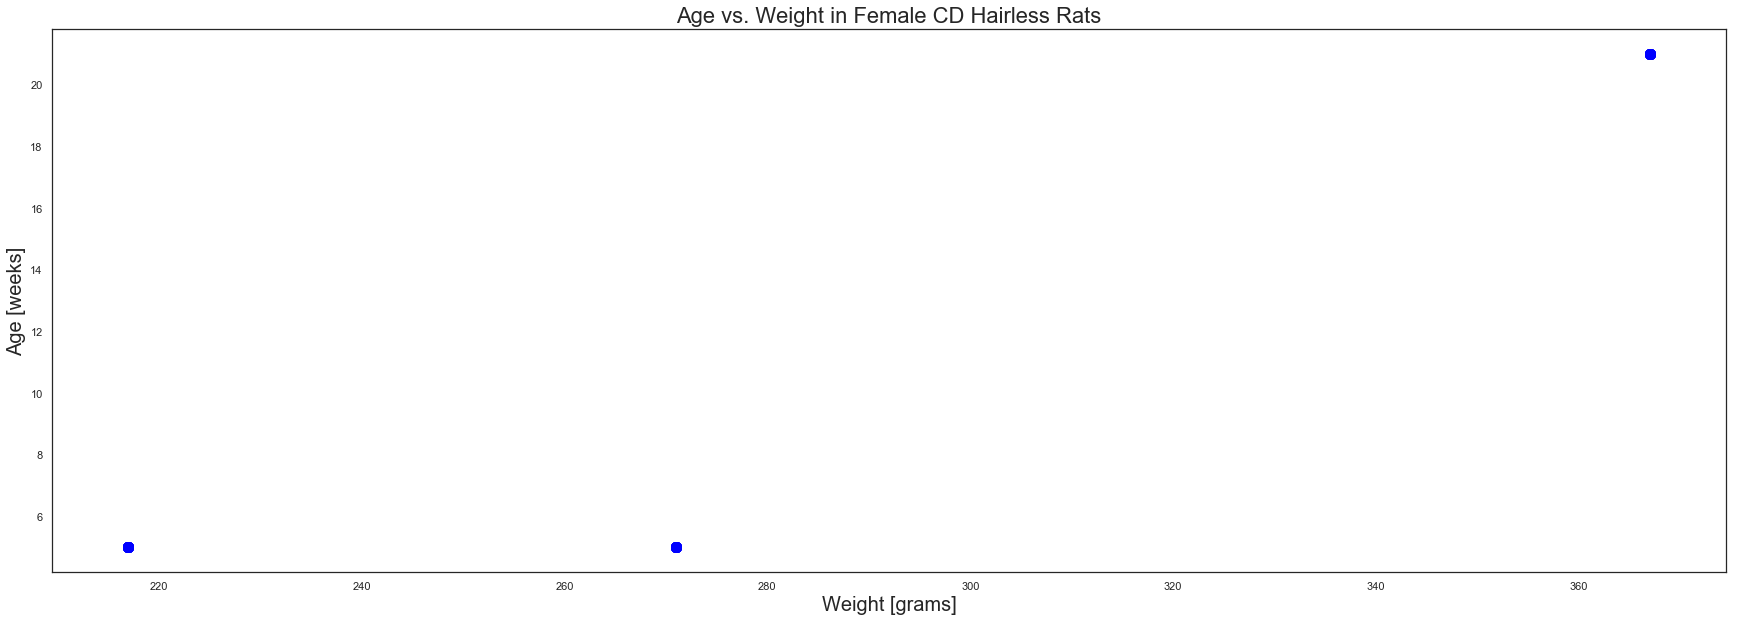

In [33]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(female_df.Weight_gms, female_df.Age_wks, s=100, alpha=0.5, color='blue')
plt.xlabel("Weight [grams]", fontsize = 20)
plt.ylabel("Age [weeks]", fontsize = 20)
plt.title("Age vs. Weight in Female CD Hairless Rats", fontsize = 22)
plt.show()

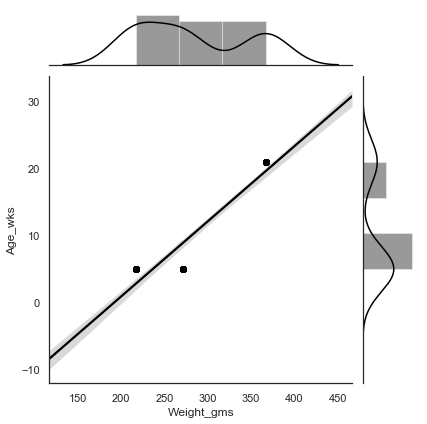

In [34]:
sns.jointplot(x=female_df.Weight_gms, y=female_df.Age_wks, kind="reg", color='black')

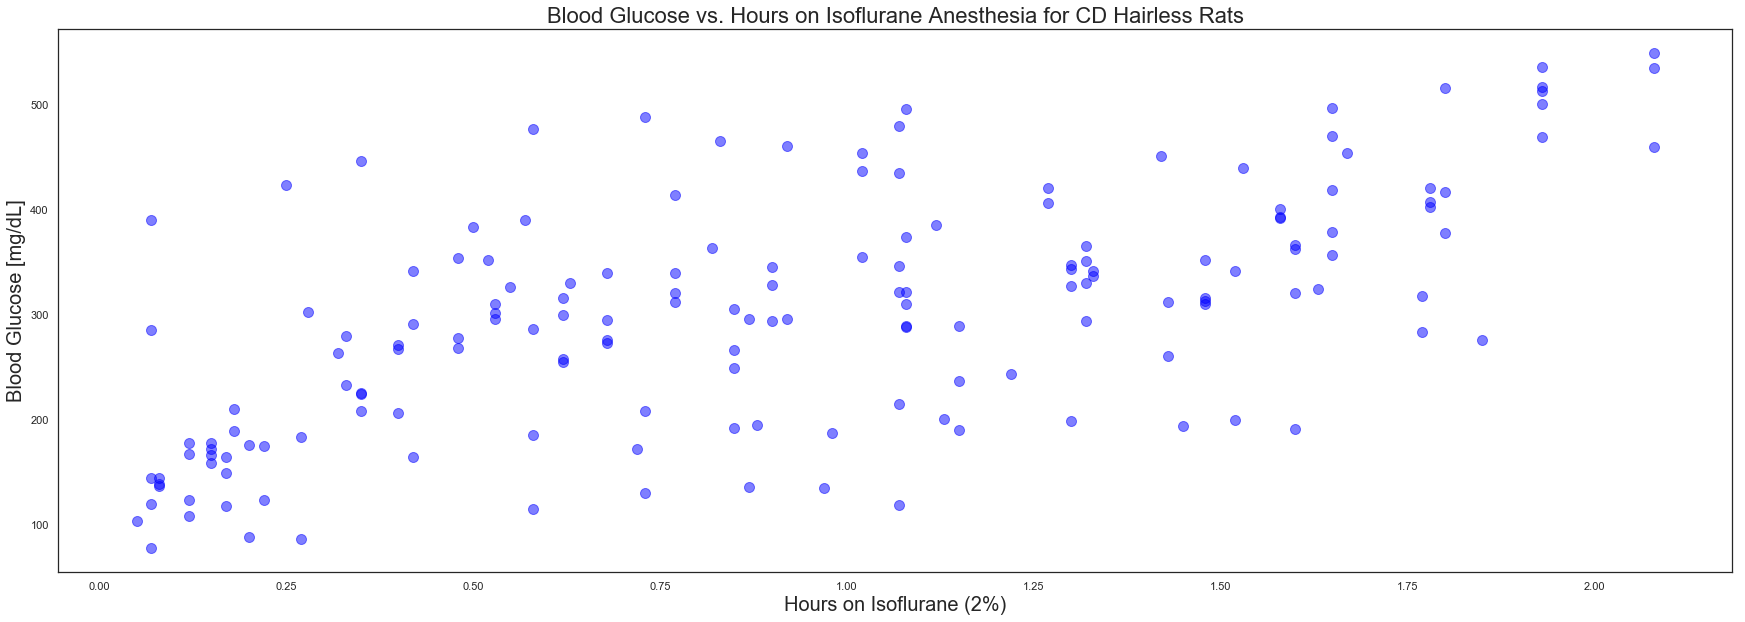

In [35]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.Hours_Isoflurane, rat_df.Blood_Glu, s=100, alpha=0.5, color='blue')
plt.xlabel("Hours on Isoflurane (2%)", fontsize = 20)
plt.ylabel("Blood Glucose [mg/dL]", fontsize = 20)
plt.title("Blood Glucose vs. Hours on Isoflurane Anesthesia for CD Hairless Rats", fontsize = 22)
plt.show()

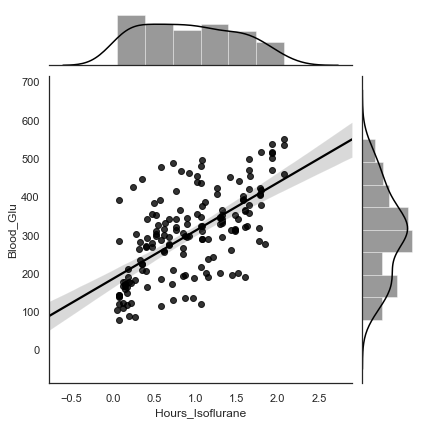

In [36]:
sns.jointplot(x=rat_df.Hours_Isoflurane, y=rat_df.Blood_Glu, kind="reg", color='black')

# Glucose EDA

In [37]:
# Correlation between 
rat_df[["Hydration", "Blood_Glu", "ISF_Glu"]].groupby(["Hydration"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Hydration,Blood_Glu,ISF_Glu
0,0,302.662338,222.0
1,1,249.444444,NaN


In [38]:
# Correlation between 
rat_df[["Fasted", "Blood_Glu", "ISF_Glu"]].groupby(["Fasted"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Fasted,Blood_Glu,ISF_Glu
0,0,317.360902,321.75
1,1,227.974359,188.75


In [39]:
# Correlation between 
rat_df[["Sex", "Blood_Glu", "ISF_Glu"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Sex,Blood_Glu,ISF_Glu
0,F,334.779412,NaN
1,M,250.272727,NaN


In [40]:
# Correlation between 
rat_df[["STZ Injected", "Blood_Glu", "ISF_Glu"]].groupby(["STZ Injected"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,STZ Injected,Blood_Glu,ISF_Glu
1,1,324.189189,322.000000
0,0,289.666667,176.545455


In [41]:
# Correlation between 
rat_df[["Age_wks", "Blood_Glu", "ISF_Glu"]].groupby(["Age_wks"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Age_wks,Blood_Glu,ISF_Glu
6,21.0,362.136364,NaN
0,5.0,321.695652,NaN
2,6.5,269.200000,NaN
3,7.0,237.600000,NaN
5,12.0,140.000000,NaN
1,6.0,NaN,NaN
4,10.0,NaN,NaN


In [42]:
# Correlation between 
rat_df[["Weight_gms", "Blood_Glu", "ISF_Glu"]].groupby(["Weight_gms"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Weight_gms,Blood_Glu,ISF_Glu
3,219.0,571.000000,NaN
11,367.0,362.136364,NaN
6,271.0,341.789474,NaN
2,217.0,307.555556,NaN
4,249.0,269.200000,NaN
7,288.0,160.000000,NaN
5,266.0,150.000000,NaN
13,449.0,135.000000,NaN
0,128.0,NaN,NaN
1,158.0,NaN,NaN


# Ketone EDA

In [43]:
# Correlation between 
rat_df[["Hydration", "Blood_Ket", "ISF_Ket"]].groupby(["Hydration"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Hydration,Blood_Ket,ISF_Ket
1,1,0.213333,NaN
0,0,0.185496,0.624324


In [44]:
# Correlation between 
rat_df[["Fasted", "Blood_Ket", "ISF_Ket"]].groupby(["Fasted"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Fasted,Blood_Ket,ISF_Ket
1,1,0.553846,0.917143
0,0,0.055140,0.361538


In [45]:
# Correlation between 
rat_df[["Sex", "Blood_Ket", "ISF_Ket"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Sex,Blood_Ket,ISF_Ket
1,M,0.168421,NaN
0,F,0.060000,NaN


In [46]:
# Correlation between 
rat_df[["STZ Injected", "Blood_Ket", "ISF_Ket"]].groupby(["STZ Injected"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,STZ Injected,Blood_Ket,ISF_Ket
0,0,0.216964,0.705172
1,1,0.094118,0.331250


In [47]:
# Correlation between 
rat_df[["Age_wks", "Blood_Ket", "ISF_Ket"]].groupby(["Age_wks"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Age_wks,Blood_Ket,ISF_Ket
2,6.5,0.200000,NaN
3,7.0,0.160000,NaN
0,5.0,0.128571,NaN
5,12.0,0.000000,NaN
6,21.0,0.000000,NaN
1,6.0,NaN,NaN
4,10.0,NaN,NaN


In [48]:
# Correlation between 
rat_df[["Weight_gms", "Blood_Ket", "ISF_Ket"]].groupby(["Weight_gms"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Weight_gms,Blood_Ket,ISF_Ket
2,217.0,0.207692,NaN
4,249.0,0.200000,NaN
3,219.0,0.000000,NaN
5,266.0,0.000000,NaN
6,271.0,0.000000,NaN
7,288.0,0.000000,NaN
11,367.0,0.000000,NaN
13,449.0,0.000000,NaN
0,128.0,NaN,NaN
1,158.0,NaN,NaN


# Lactate EDA

In [49]:
# Correlation between 
rat_df[["Hydration", "Blood_Lac", "ISF_Lac"]].groupby(["Hydration"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Hydration,Blood_Lac,ISF_Lac
1,1,13.882353,NaN
0,0,3.021176,NaN


In [50]:
# Correlation between 
rat_df[["Fasted", "Blood_Lac", "ISF_Lac"]].groupby(["Fasted"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Fasted,Blood_Lac,ISF_Lac
0,0,4.831373,NaN
1,1,NaN,NaN


In [51]:
# Correlation between 
rat_df[["Sex", "Blood_Lac", "ISF_Lac"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Sex,Blood_Lac,ISF_Lac
1,M,11.600000,NaN
0,F,3.110769,NaN


In [52]:
# Correlation between 
rat_df[["STZ Injected", "Blood_Lac", "ISF_Lac"]].groupby(["STZ Injected"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,STZ Injected,Blood_Lac,ISF_Lac
1,1,12.678947,NaN
0,0,3.034940,NaN


In [53]:
# Correlation between 
rat_df[["Age_wks", "Blood_Lac", "ISF_Lac"]].groupby(["Age_wks"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Age_wks,Blood_Lac,ISF_Lac
2,6.5,15.378571,NaN
3,7.0,5.120000,NaN
6,21.0,3.975000,NaN
0,5.0,2.726667,NaN
5,12.0,1.350000,NaN
1,6.0,NaN,NaN
4,10.0,NaN,NaN


In [54]:
# Correlation between 
rat_df[["Weight_gms", "Blood_Lac", "ISF_Lac"]].groupby(["Weight_gms"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Weight_gms,Blood_Lac,ISF_Lac
4,249.0,15.378571,NaN
6,271.0,4.111111,NaN
11,367.0,3.975000,NaN
3,219.0,2.900000,NaN
2,217.0,1.803704,NaN
5,266.0,1.700000,NaN
7,288.0,1.600000,NaN
13,449.0,1.400000,NaN
0,128.0,NaN,NaN
1,158.0,NaN,NaN


In [55]:
novaprime_df = rat_df.dropna(subset=['pH'])

In [56]:
novaprime_df.shape

(2, 57)

# NovaPrime Results

IndexError: index 11 is out of bounds for axis 0 with size 11

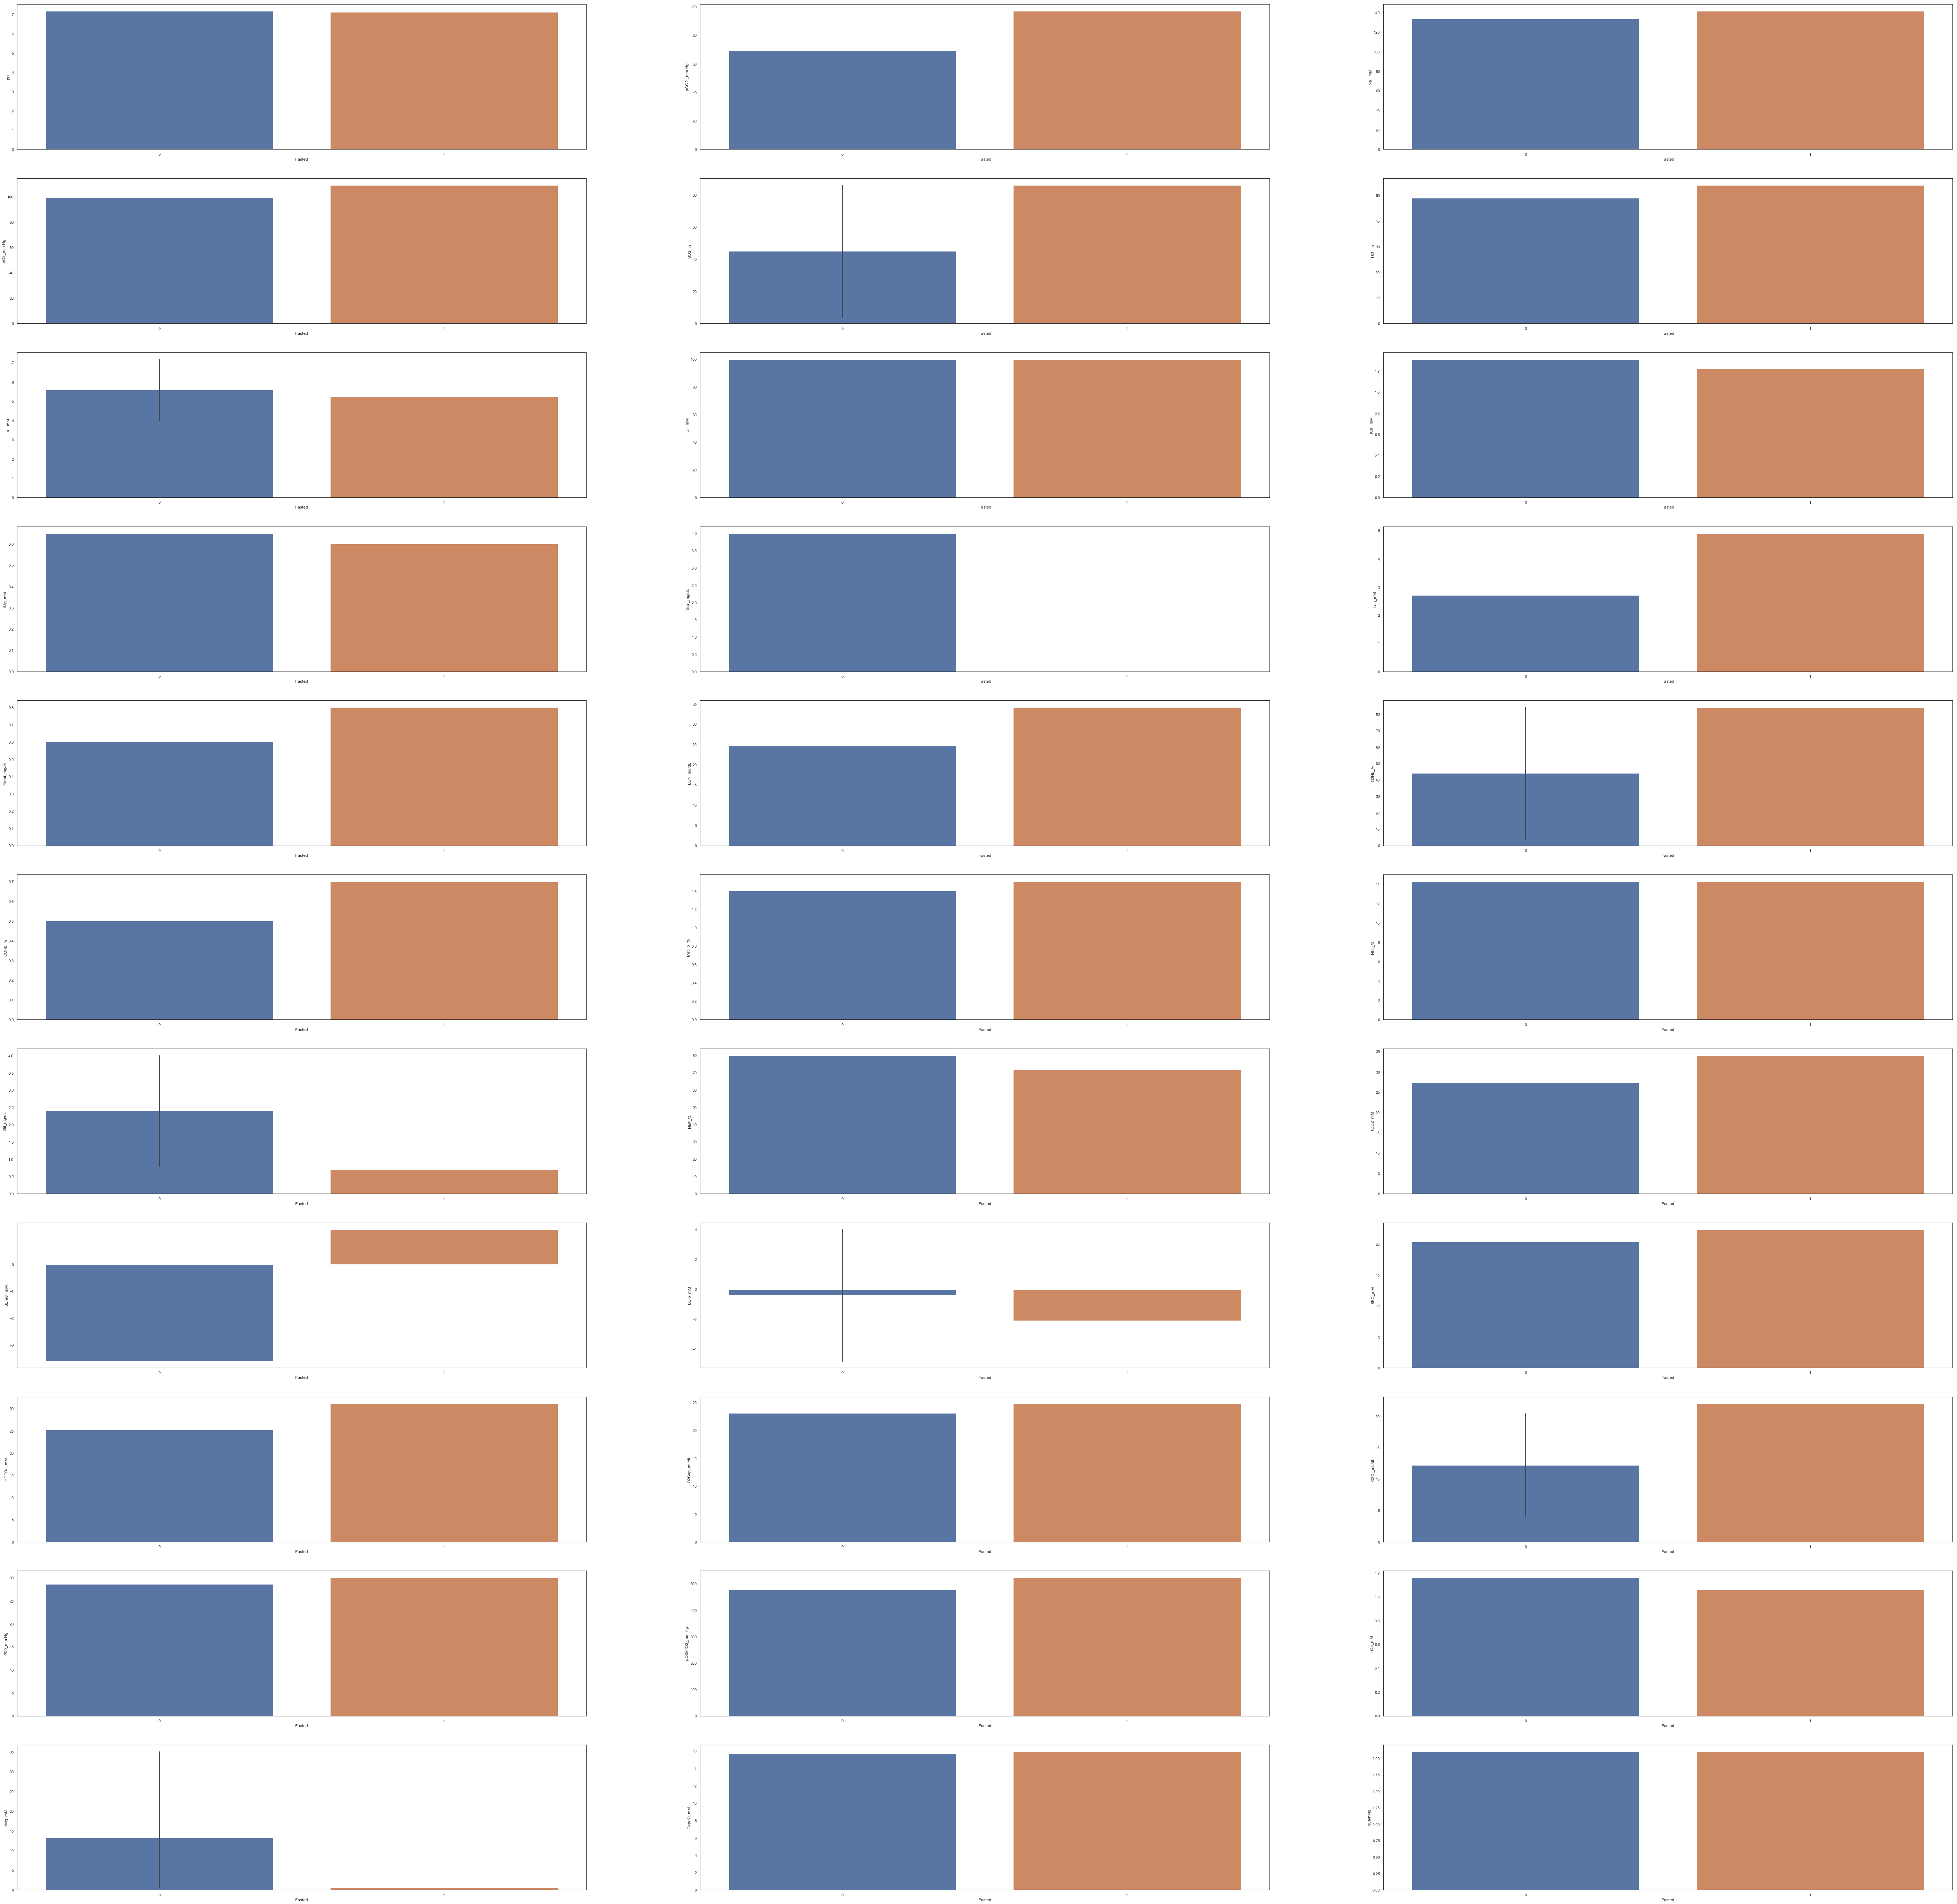

In [57]:
fig, axes =plt.subplots(11,3, figsize=(100, 100))
sns.barplot(  y="pH", x= "Fasted", data=rat_df, ax=axes[0,0])
sns.barplot(  y="pCO2 _mm Hg", x= "Fasted", data=rat_df, ax=axes[0,1])
sns.barplot(  y="Na _mM", x= "Fasted", data=rat_df, ax=axes[0,2])
sns.barplot(  y="pO2_mm Hg", x= "Fasted", data=rat_df, ax=axes[1,0])
sns.barplot(  y="SO2_%", x= "Fasted", data=rat_df, ax=axes[1,1])
sns.barplot(  y="Hct _%", x= "Fasted", data=rat_df, ax=axes[1,2])
sns.barplot(  y="K _mM", x= "Fasted", data=rat_df, ax=axes[2,0])
sns.barplot(  y="Cl _mM", x= "Fasted", data=rat_df, ax=axes[2,1])
sns.barplot(  y="iCa _mM", x= "Fasted", data=rat_df, ax=axes[2,2])
sns.barplot(  y="iMg_mM", x= "Fasted", data=rat_df, ax=axes[3,0])
sns.barplot(  y="Glu _mg/dL", x= "Fasted", data=rat_df, ax=axes[3,1])
sns.barplot(  y="Lac_mM", x= "Fasted", data=rat_df, ax=axes[3,2])
sns.barplot(  y="Creat_mg/dL", x= "Fasted", data=rat_df, ax=axes[4,0])
sns.barplot(  y="BUN_mg/dL", x= "Fasted", data=rat_df, ax=axes[4,1])
sns.barplot(  y="O2Hb_%", x= "Fasted", data=rat_df, ax=axes[4,2])
sns.barplot(  y="COHb_%", x= "Fasted", data=rat_df, ax=axes[5,0])
sns.barplot(  y="MetHb_%", x= "Fasted", data=rat_df, ax=axes[5,1])
sns.barplot(  y="Hhb_%", x= "Fasted", data=rat_df, ax=axes[5,2])
sns.barplot(  y="tBil_mg/dL", x= "Fasted", data=rat_df, ax=axes[6,0])
sns.barplot(  y="HbF_%", x= "Fasted", data=rat_df, ax=axes[6,1])
sns.barplot(  y="TCO2_mM", x= "Fasted", data=rat_df, ax=axes[6,2])
sns.barplot(  y="BE-ecf_mM", x= "Fasted", data=rat_df, ax=axes[7,0])
sns.barplot(  y="BE-b_mM", x= "Fasted", data=rat_df, ax=axes[7,1])
sns.barplot(  y="SBC_mM", x= "Fasted", data=rat_df, ax=axes[7,2])
sns.barplot(  y="HCO3- _mM", x= "Fasted", data=rat_df, ax=axes[8,0])
sns.barplot(  y="O2Cap_mL/dL", x= "Fasted", data=rat_df, ax=axes[8,1])
sns.barplot(  y="O2Ct_mL/dL", x= "Fasted", data=rat_df, ax=axes[8,2])
sns.barplot(  y="P50_mm Hg", x= "Fasted", data=rat_df, ax=axes[9,0])
sns.barplot(  y="pO2/FlO2_mm Hg", x= "Fasted", data=rat_df, ax=axes[9,1])
sns.barplot(  y="nCa_mM", x= "Fasted", data=rat_df, ax=axes[9,2])
sns.barplot(  y="nMg_mM", x= "Fasted", data=rat_df, ax=axes[10,0])
sns.barplot(  y="Gap(K)_mM", x= "Fasted", data=rat_df, ax=axes[10,1])
sns.barplot(  y="nCa/nMg", x= "Fasted", data=rat_df, ax=axes[10,2])
sns.barplot(  y="BUN/Creat", x= "Fasted", data=rat_df, ax=axes[11,0])

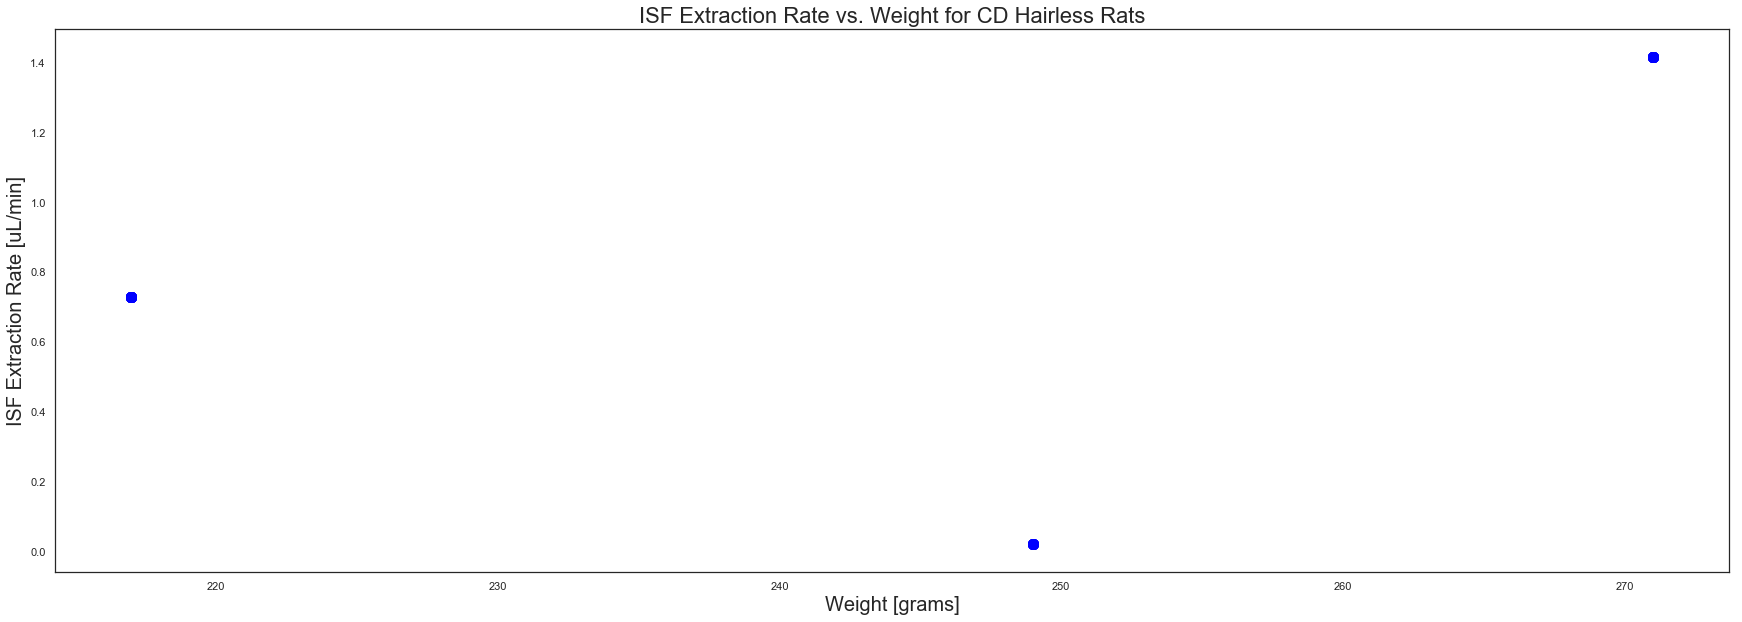

In [267]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.Weight_gms, rat_df['ExtractionRate_uL/min'], s=100, alpha=0.5, color='blue')
plt.xlabel("Weight [grams]", fontsize = 20)
plt.ylabel("ISF Extraction Rate [uL/min]", fontsize = 20)
plt.title("ISF Extraction Rate vs. Weight for CD Hairless Rats", fontsize = 22)
plt.show()

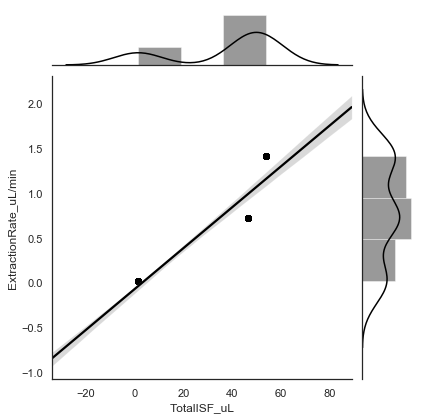

In [275]:
sns.jointplot(x=rat_df.TotalISF_uL, y=rat_df['ExtractionRate_uL/min'], kind="reg", color='black')